# Business model: Video Game Sales

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(9,4)

In [2]:
#read csv
df = pd.read_csv('/Users/honghanh/Downloads/vgsales.csv')
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## 1: Data Cleaning

In [3]:
# Check data missing

for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing_data))

Rank - 0.0%
Name - 0.0%
Platform - 0.0%
Year - 0.016327268345583804%
Genre - 0.0%
Publisher - 0.003494396915290999%
NA_Sales - 0.0%
EU_Sales - 0.0%
JP_Sales - 0.0%
Other_Sales - 0.0%
Global_Sales - 0.0%


In [4]:
df.dropna(inplace = True)

In [5]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
num_rows, num_columns = df.shape
print(f'Column: {num_columns}')
print(f'Row:{num_rows}')

Column: 11
Row:16291


## 2: Data for exploration

### 1: What genre games have been made the most?

In [6]:
df['Genre'].value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

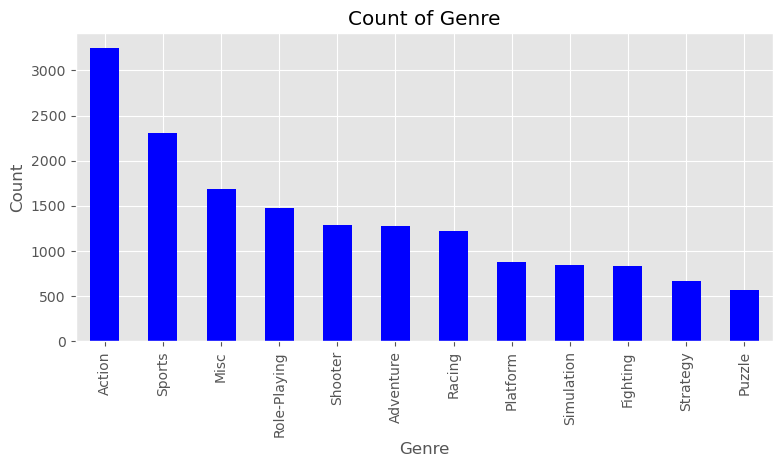

In [7]:
genre_counts = df['Genre'].value_counts()
genre_counts.plot(kind = 'bar', color = 'blue')

plt.xlabel('Genre')
plt.ylabel('Count')

plt.title('Count of Genre')
plt.xticks(rotation = 90)

plt.show()

#### => Most people love action and sports games

### 2: Which platforms do users often use?

In [8]:
df['Platform'].value_counts()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

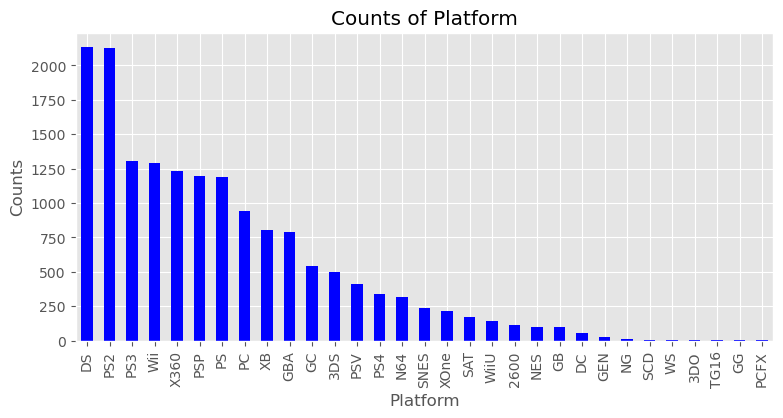

In [9]:
Platform_counts = df['Platform'].value_counts()
Platform_counts.plot(kind = 'bar', color = 'blue')

plt.xlabel('Platform')
plt.ylabel('Counts')
plt.title('Counts of Platform')
plt.xticks(rotation=90)
plt.show()

#### => DS, PS2 attract the most users while PS3, Wii, X360, PS attract an equal number of people

### 3: Which year had the most game release?

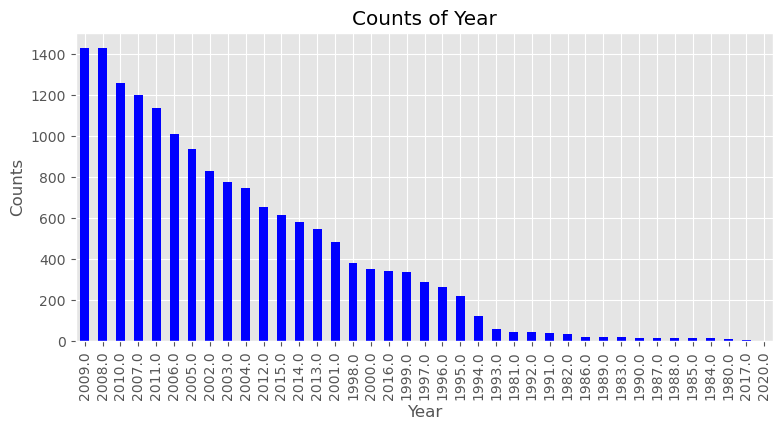

In [10]:
Year_counts = df['Year'].value_counts()
Year_counts.plot(kind = 'bar', color = 'blue')

plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Counts of Year')
plt.xticks(rotation = 90)

plt.show()

#### => The trend of releasing games between 2005 and 2009 increased. However, in recent year, the trend has been decreasing

### 4: Which year had the highest sales worldwide?

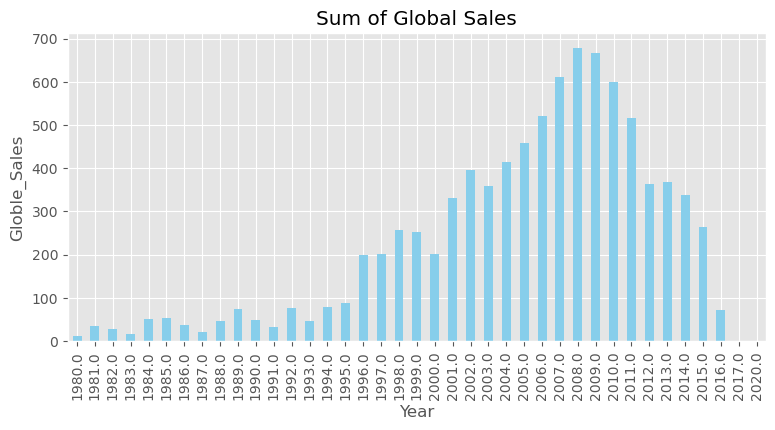

In [11]:
Data_Year = df.groupby(by=['Year'])['Global_Sales'].sum()
Data_Year.plot(kind='bar', color = 'skyblue')
plt.xlabel('Year')
plt.ylabel('Globle_Sales')
plt.title('Sum of Global Sales')
plt.xticks(rotation=90)
plt.show()

### 5: Which genre game has been released the most in a single year?

In [12]:
group = df.groupby(['Genre','Year']).size().reset_index(name='Genre_Count')
max_genre_counts = group.groupby('Year')['Genre_Count'].idxmax()
result = group.loc[max_genre_counts][['Year', 'Genre', 'Genre_Count']]
print(result)

       Year         Genre  Genre_Count
95   1980.0          Misc            4
1    1981.0        Action           25
2    1982.0        Action           18
3    1983.0        Action            7
165  1984.0        Puzzle            3
130  1985.0      Platform            4
6    1986.0        Action            6
333  1987.0        Sports            4
133  1988.0      Platform            4
168  1989.0        Puzzle            5
10   1990.0        Action            3
337  1991.0        Sports            7
70   1992.0      Fighting            7
71   1993.0      Fighting           11
72   1994.0      Fighting           22
73   1995.0      Fighting           29
342  1996.0        Sports           52
343  1997.0        Sports           46
344  1998.0        Sports           70
345  1999.0        Sports           62
346  2000.0        Sports           81
347  2001.0        Sports           96
348  2002.0        Sports          188
23   2003.0        Action          144
24   2004.0        Action

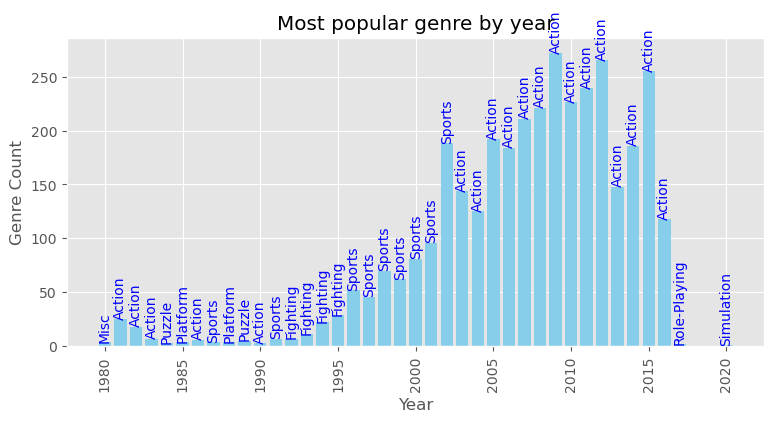

In [13]:
plt.bar(result['Year'], result['Genre_Count'], color ='skyblue')
plt.xlabel('Year')
plt.ylabel('Genre Count')
plt.title('Most popular genre by year')
plt.xticks(rotation =90)

for i, row in result.iterrows():
    plt.text(row['Year'], row['Genre_Count'], row['Genre'], ha = 'center', va = 'bottom', color = 'blue', rotation=90)

plt.show()

### 6: Which film had the highest sales in single Year? 

In [14]:
df = df.sort_values(by='Global_Sales', ascending =False)
max_Global_Sales = df.groupby('Year')['Global_Sales'].idxmax()
result = df.loc[max_Global_Sales,['Year','Name','Global_Sales']]
print(result)

         Year                                              Name  Global_Sales
258    1980.0                                         Asteroids          4.31
239    1981.0                                          Pitfall!          4.50
89     1982.0                                           Pac-Man          7.81
421    1983.0                                          Baseball          3.20
9      1984.0                                         Duck Hunt         28.31
1      1985.0                                 Super Mario Bros.         40.24
127    1986.0                               The Legend of Zelda          6.51
251    1987.0                   Zelda II: The Adventure of Link          4.38
22     1988.0                               Super Mario Bros. 3         17.28
5      1989.0                                            Tetris         30.26
18     1990.0                                 Super Mario World         20.61
231    1991.0           The Legend of Zelda: A Link to the Past 

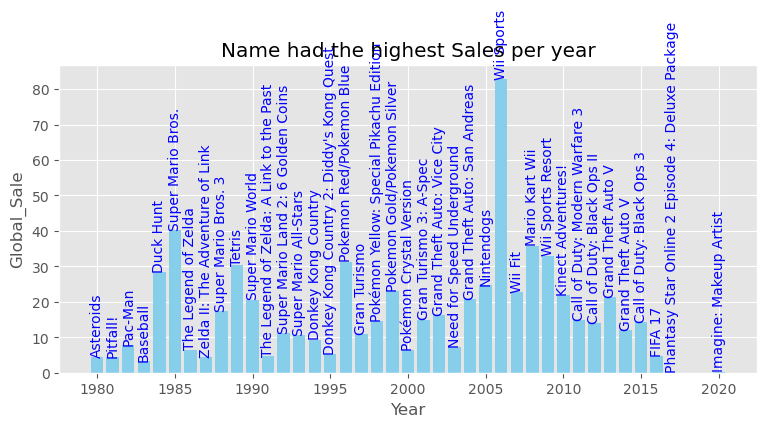

In [15]:
result_sorted = result.sort_values(by ='Global_Sales', ascending = False)
plt.bar(result_sorted['Year'], result_sorted['Global_Sales'], color ='skyblue')
plt.xlabel('Year')
plt.ylabel('Global_Sale')
plt.title('Name had the highest Sales per year')


for i, row in result_sorted.iterrows():
    plt.text(row['Year'], row['Global_Sales'], row['Name'], ha ='center',va='bottom',color='blue',rotation=90)

plt.show()
                                                           

### 7: top 20 games had the highest sales

In [16]:
Top_Games = df.sort_values(by ='Global_Sales', ascending = False)
Top_Games = Top_Games[['Name','Year','Genre', 'Global_Sales']]
Top_20_Games = Top_Games.head(20)
print(Top_20_Games)

                                            Name    Year         Genre  \
0                                     Wii Sports  2006.0        Sports   
1                              Super Mario Bros.  1985.0      Platform   
2                                 Mario Kart Wii  2008.0        Racing   
3                              Wii Sports Resort  2009.0        Sports   
4                       Pokemon Red/Pokemon Blue  1996.0  Role-Playing   
5                                         Tetris  1989.0        Puzzle   
6                          New Super Mario Bros.  2006.0      Platform   
7                                       Wii Play  2006.0          Misc   
8                      New Super Mario Bros. Wii  2009.0      Platform   
9                                      Duck Hunt  1984.0       Shooter   
10                                    Nintendogs  2005.0    Simulation   
11                                 Mario Kart DS  2005.0        Racing   
12                   Pokemon Gold/Poke

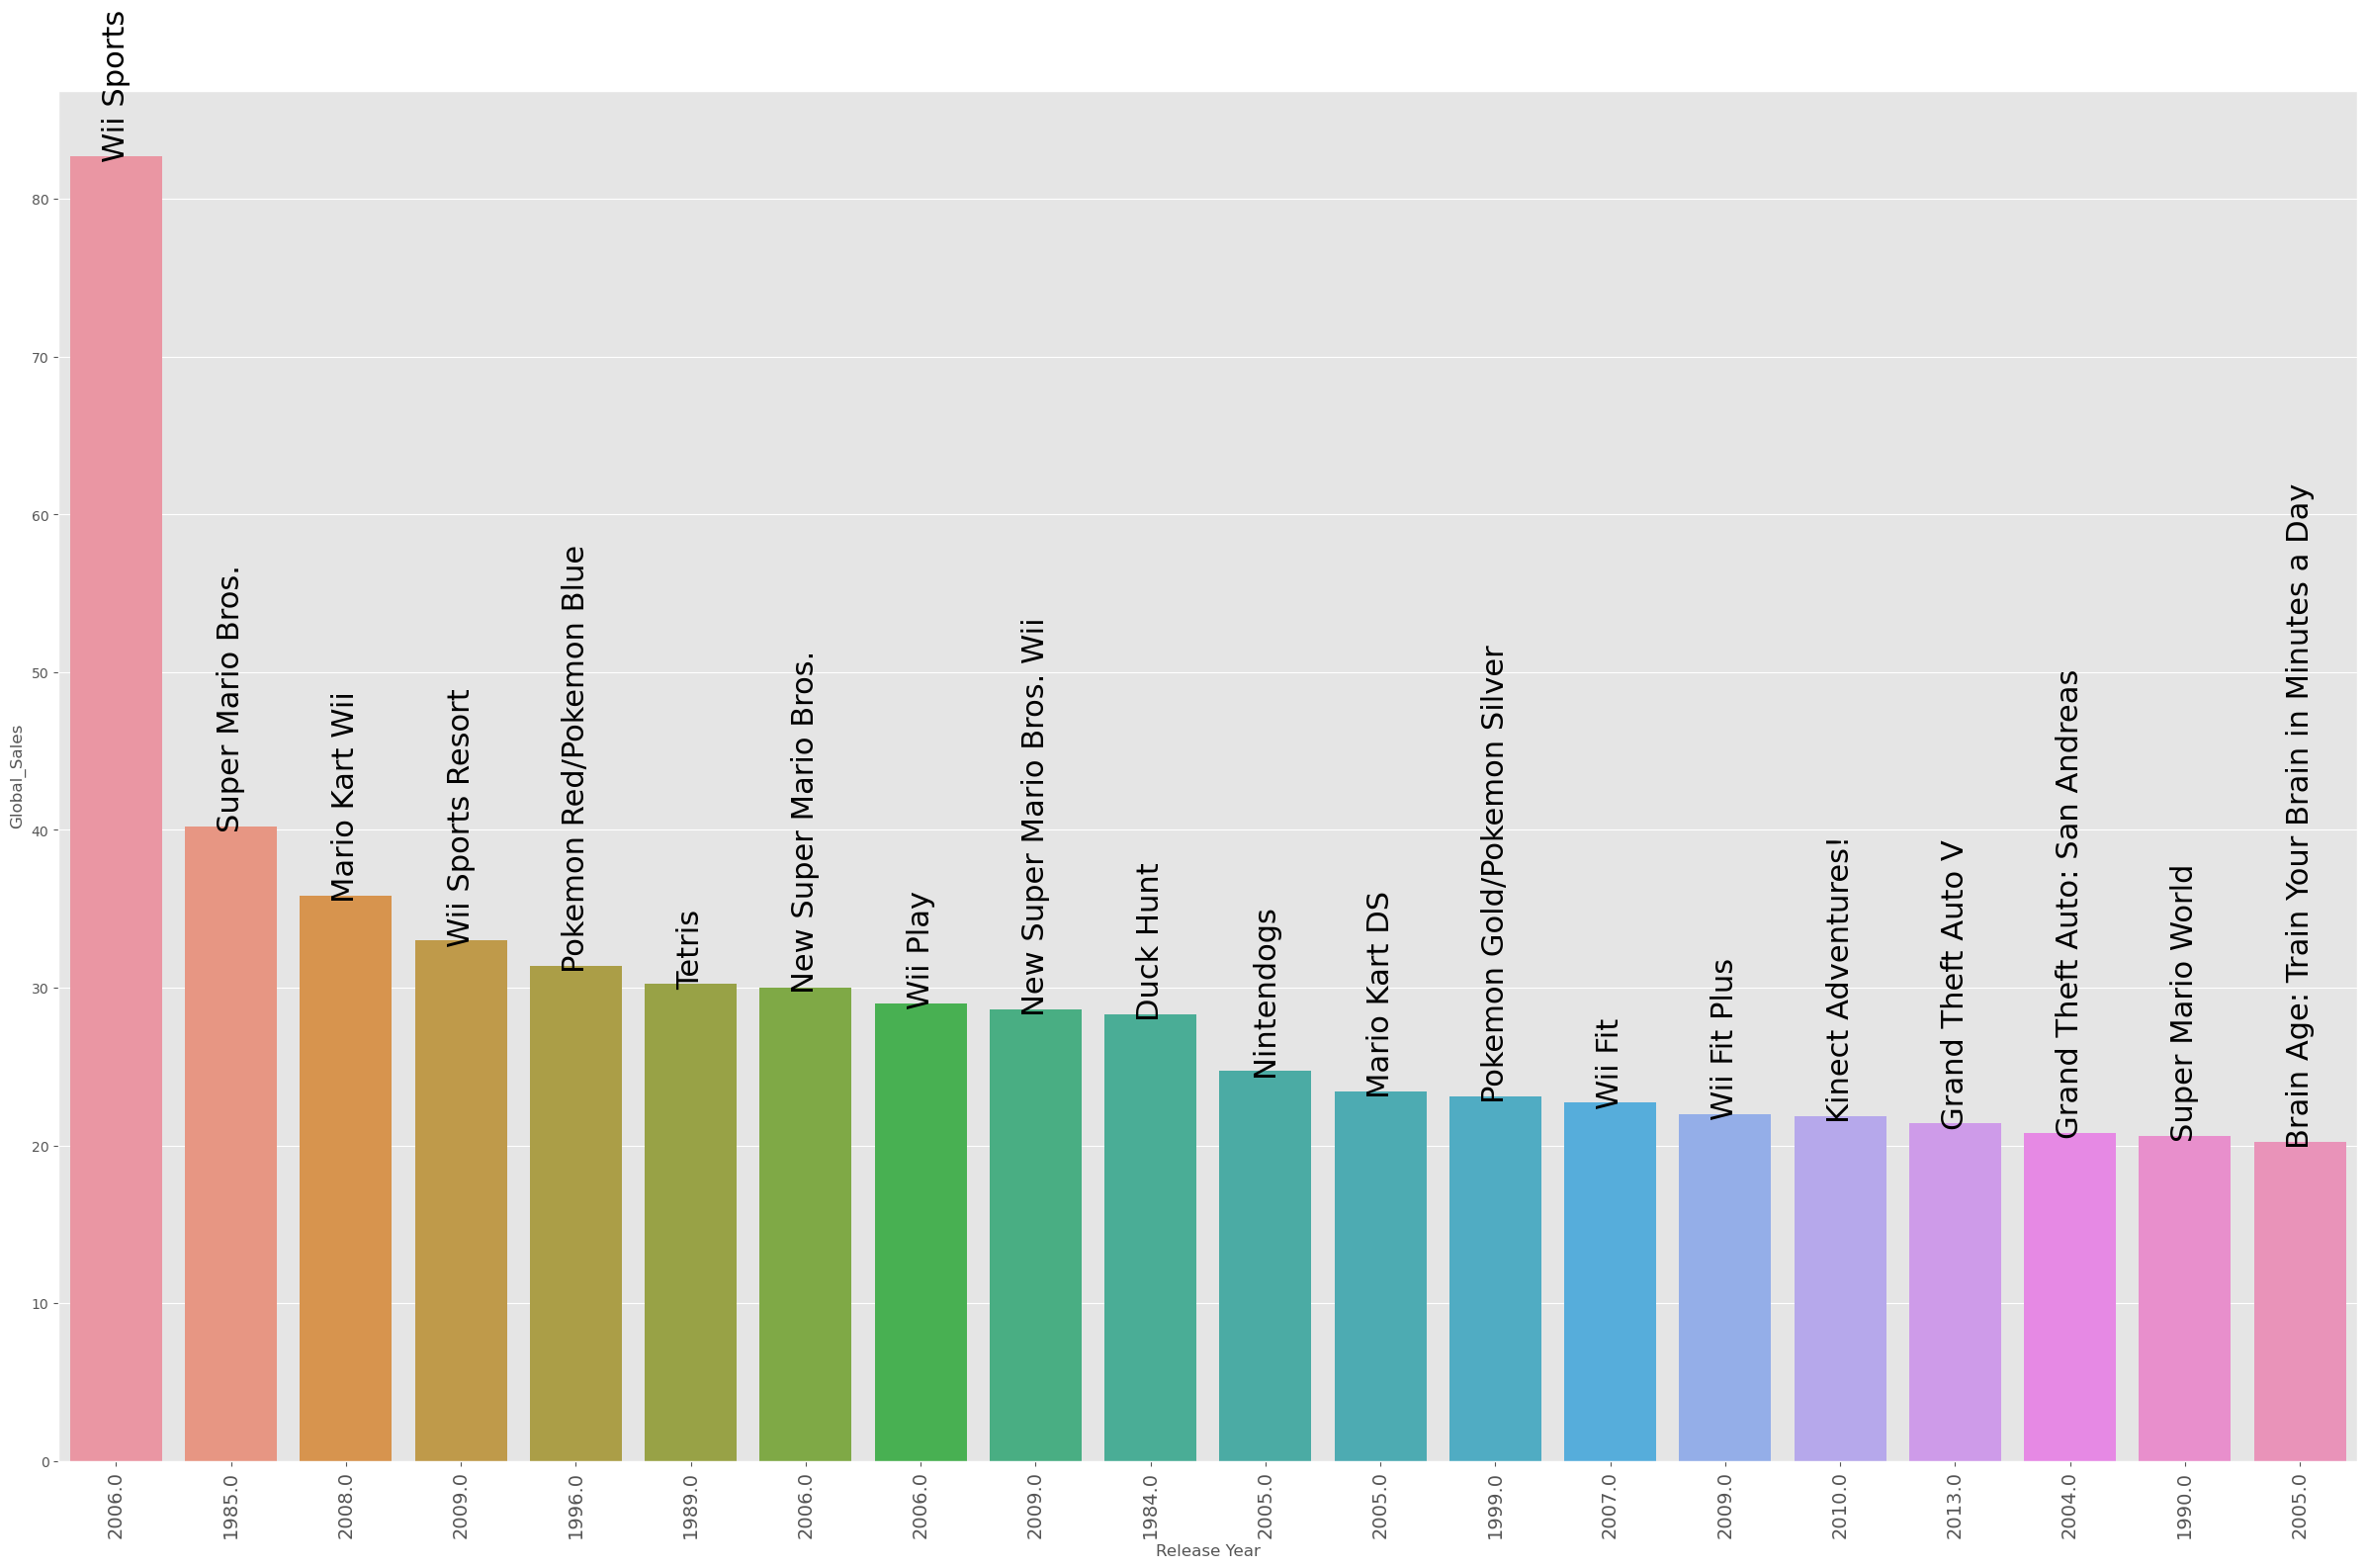

In [17]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

name = Top_20_Games['Name']  
year = Top_20_Games['Year']
y = np.arange(0, 20)

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=Top_20_Games) 
index = 0
for value in Top_20_Games['Global_Sales']:  
    g.text(index, value, name[index], color='black', size=22, ha='center', rotation = 90)
    index += 1

plt.xticks(y, year, fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

### 8: Sale compearison by genre

In [18]:
groupby = df.groupby('Genre')[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(groupby)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Action          861.77    516.48    158.65       184.92       1722.84
Adventure       101.93     63.74     51.99        16.70        234.59
Fighting        220.74    100.00     87.15        36.19        444.05
Misc            396.92    211.77    106.67        73.92        789.87
Platform        445.99    200.65    130.65        51.51        829.13
Puzzle          122.01     50.52     56.68        12.47        242.21
Racing          356.93    236.31     56.61        76.68        726.76
Role-Playing    326.50    187.57    350.29        59.38        923.83
Shooter         575.16    310.45     38.18       101.90       1026.20
Simulation      181.78    113.02     63.54        31.36        389.98
Sports          670.09    371.34    134.76       132.65       1309.24
Strategy         67.83     44.84     49.10        11.23        173.27


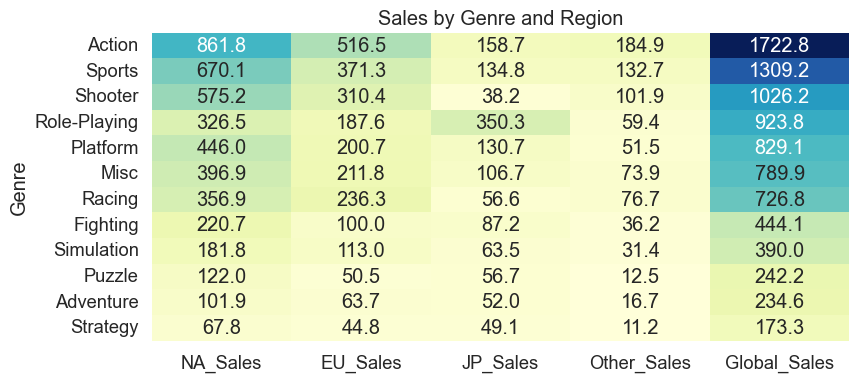

In [19]:
groupby = groupby.sort_values(by='Global_Sales', ascending=False)
sns.set(font_scale=1.2)
sns.heatmap(groupby, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False)
plt.title('Sales by Genre and Region')
plt.show()

### 9: Top Publisher by Count each year

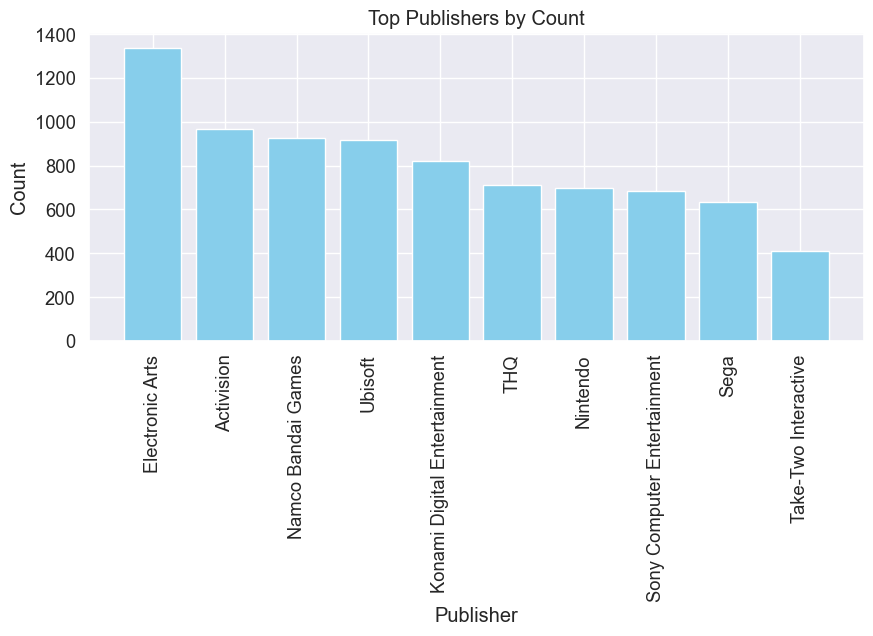

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

publisher_counts = df['Publisher'].value_counts().sort_values(ascending=False)

top_publishers = publisher_counts.head(10)

top_publishers_df = pd.DataFrame({'Publisher': top_publishers.index, 'Count': top_publishers.values})

plt.figure(figsize=(10, 4))
plt.bar(top_publishers_df['Publisher'], top_publishers_df['Count'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.title('Top Publishers by Count')
plt.show()

In [47]:
df.head( 10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### 10: Total revenue by region

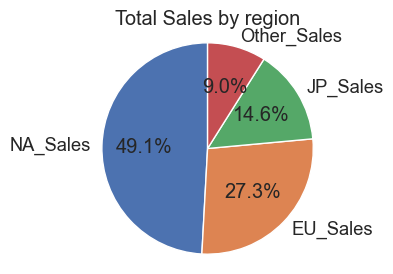

In [22]:
sales_totals = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

plt.figure(figsize=(3, 3))
plt.pie(sales_totals, labels=sales_totals.index, autopct='%1.1f%%', startangle=90)
plt.title("Total Sales by region")
plt.axis('equal') 

plt.show()

### 11: Distribution of Sales

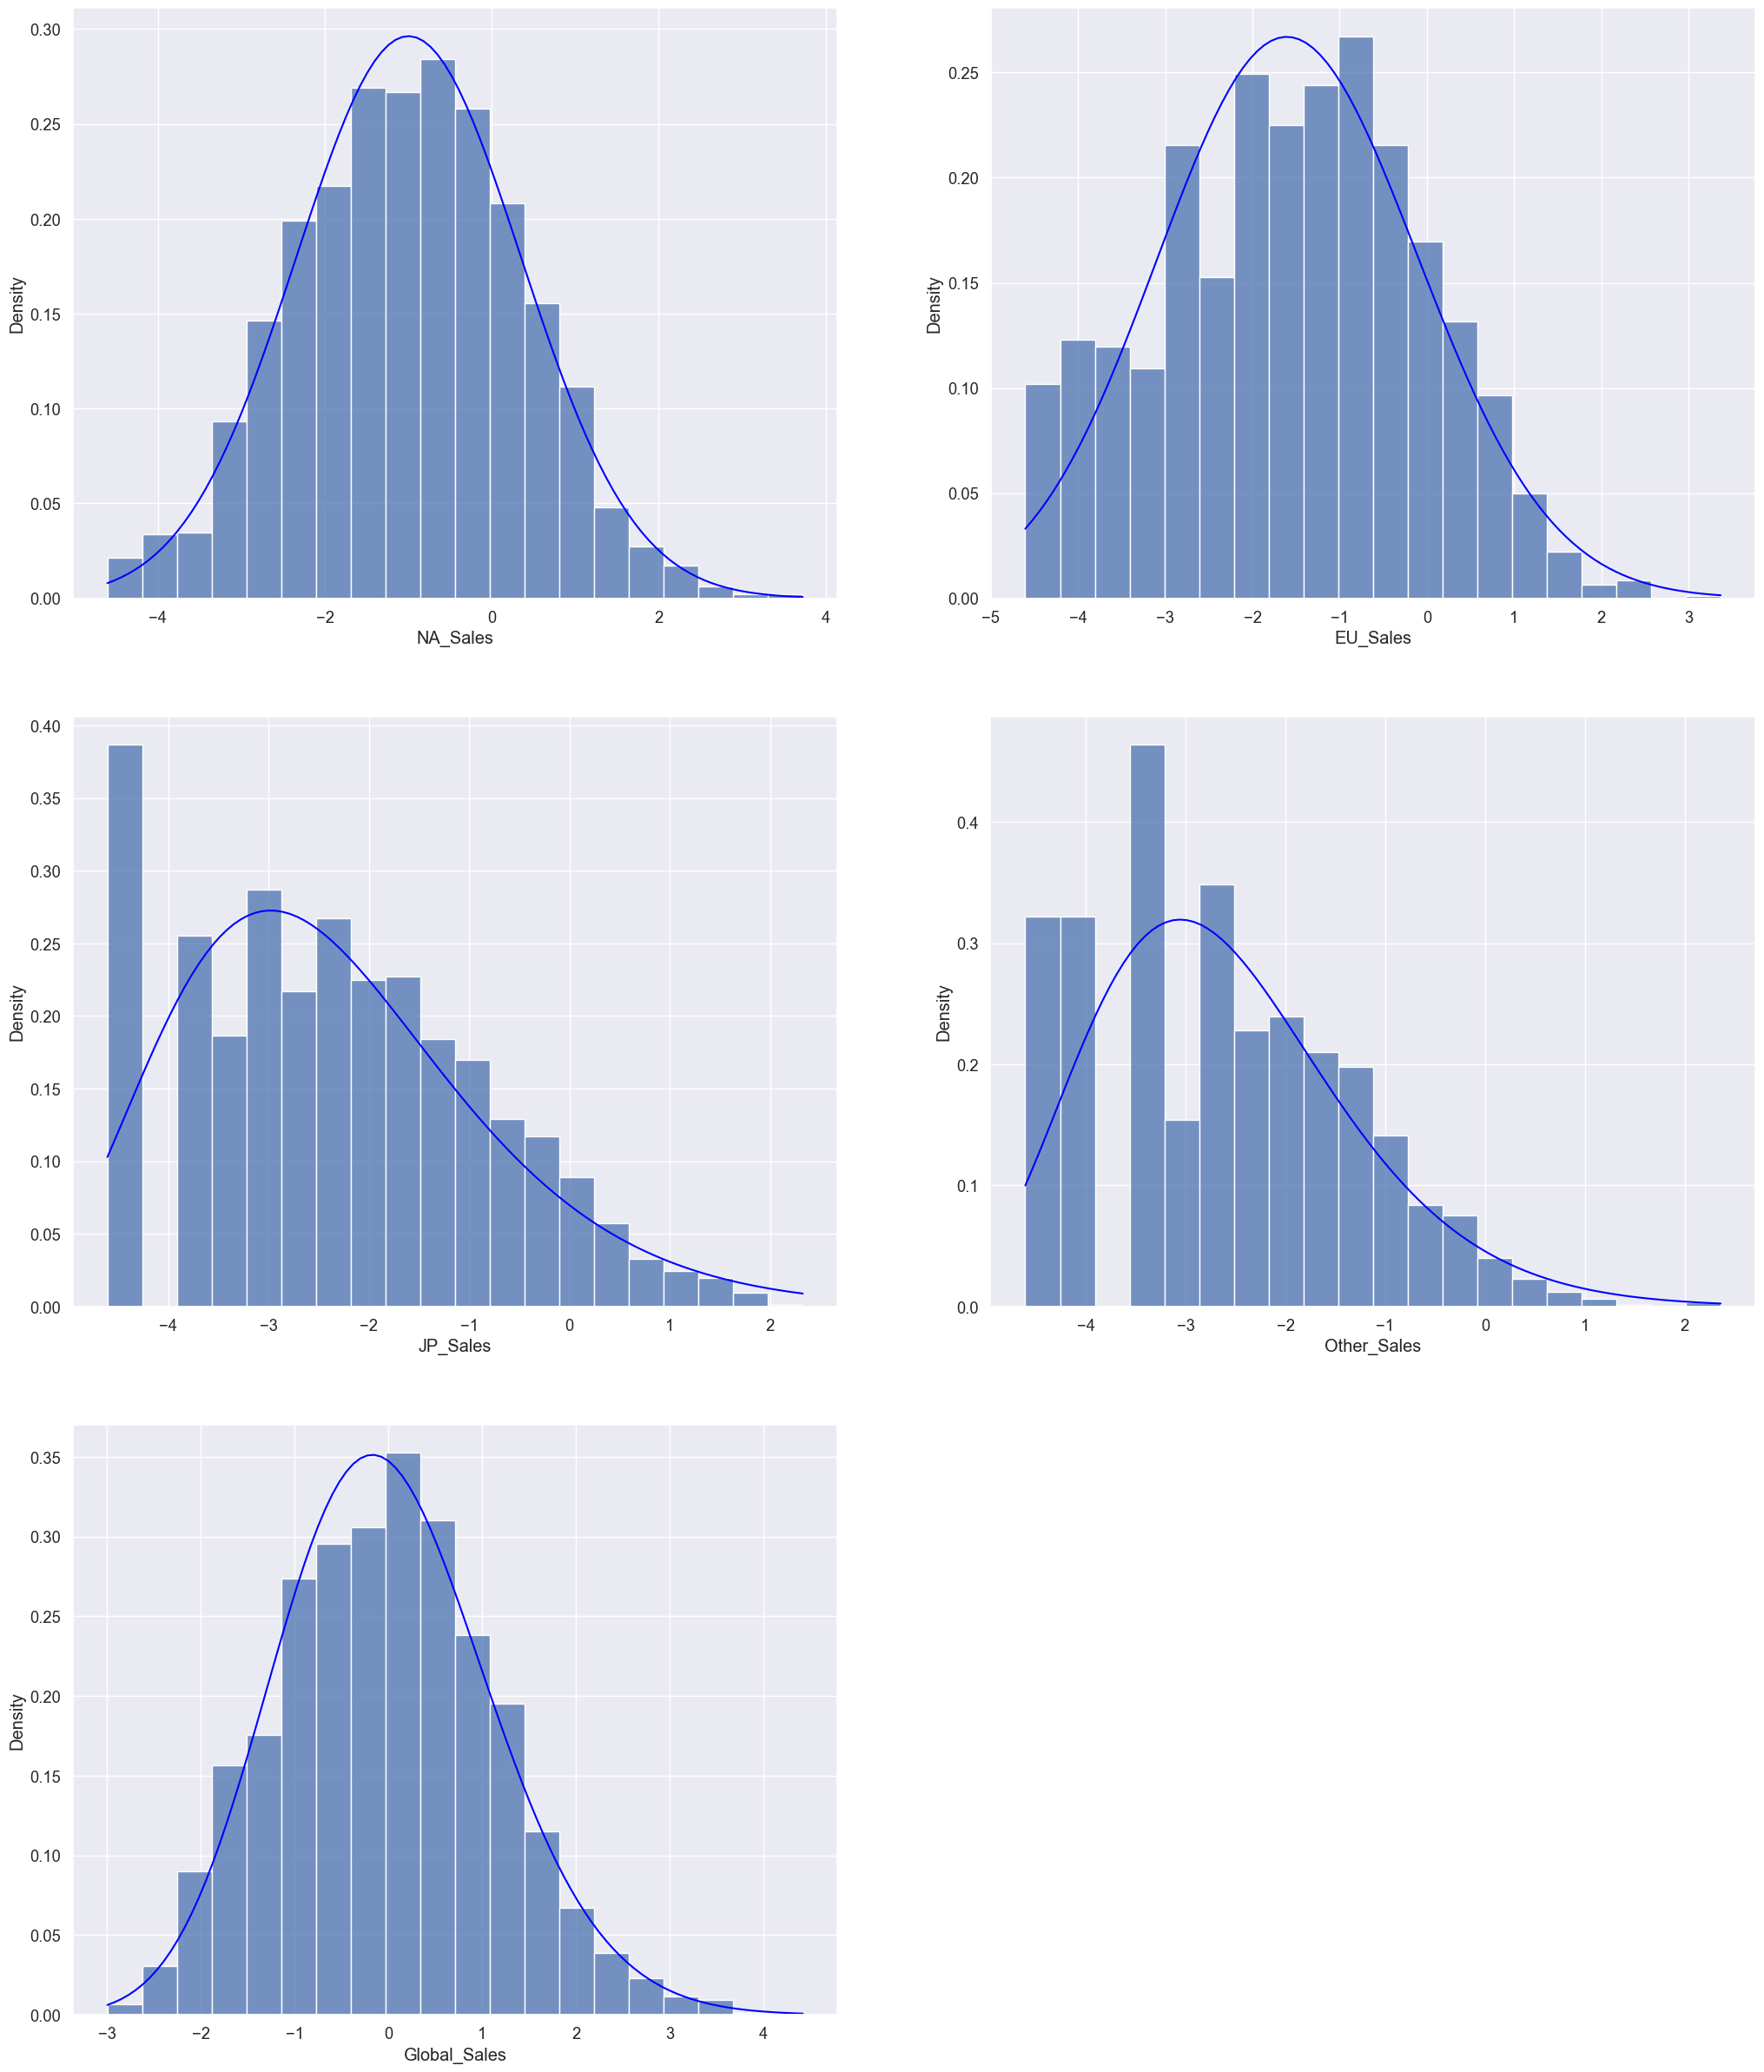

In [23]:
import seaborn as sns
import scipy.stats as stats

data_hist_log = df.copy()

data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.histplot(np.log(data_hist_log[column]), bins=20, kde=False, stat="density", common_norm=False)
    
    fit_params = stats.gamma.fit(np.log(data_hist_log[column]))
    x = np.linspace(np.min(np.log(data_hist_log[column])), np.max(np.log(data_hist_log[column])), 100)
    y = stats.gamma.pdf(x, *fit_params)
    plt.plot(x, y, label="Fit (Gamma)", color="blue")
